# Assignment 1

## Task 1, 2, 3 and 4

In [2]:
import pandas as pd
import numpy as np

# Task 1: Import dataset and ensure date column is in datetime format [cite: 26]
# NOTE: Make sure 'train.csv' is in the same folder as your script
df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Task 2: Check data types, row count, and missing values [cite: 27, 28]
print("--- INFO & DATA TYPES ---")
print(df.info())
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# Task 3: Create new columns: year, month, day of week, hour [cite: 29]
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Task 4: Rename season values (1=spring, 2=summer, 3=fall, 4=winter) [cite: 12, 30]
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_mapping)

print("\n--- FIRST 5 ROWS AFTER TRANSFORMATION ---")
print(df.head())

--- INFO & DATA TYPES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None

--- MISSING VALUES ---
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp        

## Task 5, 6. 7, 8 and 9

In [3]:
# Task 5: Total casual and registered rentals by year [cite: 31]
rentals_by_year = df.groupby('year')[['casual', 'registered']].sum()
print("\n--- TOTAL RENTALS BY YEAR ---")
print(rentals_by_year)

# Task 6: Mean hourly total rentals by season 
season_mean = df.groupby('season')['count'].mean()
print("\n--- MEAN RENTALS BY SEASON ---")
print(season_mean)
print(f"Highest mean season: {season_mean.idxmax()}")

# Task 7: Registered users on working vs non-working days 
# Note: workingday (1=working, 0=non-working)
reg_working = df.groupby(['year', 'workingday'])['registered'].sum()
casual_working = df.groupby(['year', 'workingday'])['casual'].sum()
print("\n--- REGISTERED RENTALS (Working Day vs Non-Working) ---")
print(reg_working)
print("\n--- CASUAL RENTALS (Working Day vs Non-Working) ---")
print(casual_working)

# Task 8: High/Low months for 2011 and 2012 [cite: 37, 38]
def get_peak_months(year):
    data_year = df[df['year'] == year]
    monthly_counts = data_year.groupby('month')['count'].sum()
    return monthly_counts.idxmax(), monthly_counts.idxmin()

max_2011, min_2011 = get_peak_months(2011)
max_2012, min_2012 = get_peak_months(2012)
print(f"\n2011 - Highest Month: {max_2011}, Lowest Month: {min_2011}")
print(f"2012 - Highest Month: {max_2012}, Lowest Month: {min_2012}")

# Task 9: Weather with highest/lowest mean rentals [cite: 39]
weather_mean = df.groupby('weather')['count'].mean()
print("\n--- MEAN RENTALS BY WEATHER ---")
print(weather_mean)
print(f"Highest weather: {weather_mean.idxmax()}, Lowest weather: {weather_mean.idxmin()}")


--- TOTAL RENTALS BY YEAR ---
      casual  registered
year                    
2011  155817      626162
2012  236318     1067179

--- MEAN RENTALS BY SEASON ---
season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64
Highest mean season: fall

--- REGISTERED RENTALS (Working Day vs Non-Working) ---
year  workingday
2011  0             167492
      1             458670
2012  0             281343
      1             785836
Name: registered, dtype: int64

--- CASUAL RENTALS (Working Day vs Non-Working) ---
year  workingday
2011  0              83099
      1              72718
2012  0             122938
      1             113380
Name: casual, dtype: int64

2011 - Highest Month: 7, Lowest Month: 1
2012 - Highest Month: 9, Lowest Month: 1

--- MEAN RENTALS BY WEATHER ---
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
Highest weather: 1, Lowest weather: 3


## Task 10,11 and 12

In [4]:
# Task 10: Correlation with 'count' [cite: 40, 41]
# We select only numerical columns for correlation
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
correlations = df[numeric_cols].corr()['count'].sort_values(ascending=False)
print("\n--- CORRELATION WITH TOTAL COUNT ---")
print(correlations)

# Task 11: Create 'day_period' column [cite: 42, 43]
# Bins: 0-6 (night), 6-12 (morning), 12-18 (afternoon), 18-24 (evening)
# Note: The PDF text says "12-6: afternoon", implying 12pm-6pm (18:00).
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df['day_period'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Task 12: Pivot table for day_period and workingday [cite: 44]
pivot_table = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')
print("\n--- PIVOT TABLE (Day Period vs Working Day) ---")
print(pivot_table)


--- CORRELATION WITH TOTAL COUNT ---
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
windspeed     0.101369
humidity     -0.317371
Name: count, dtype: float64

--- PIVOT TABLE (Day Period vs Working Day) ---
workingday           0           1
day_period                        
night        44.052083   16.217582
morning     157.772414  234.353763
afternoon   371.022989  266.196141
evening     180.182759  251.054662


C:\Users\jigar\AppData\Local\Temp\ipykernel_28412\1743062254.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')


# Assignment 2

In [5]:
#Importing Libraries for Assignment 2
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for all plots
sns.set_theme(style="whitegrid")

## Task 1

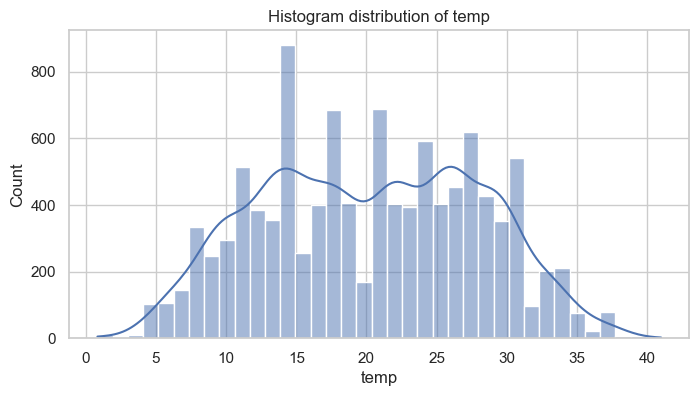

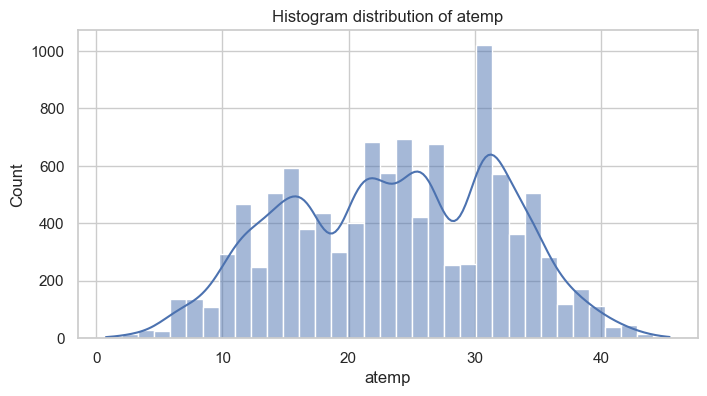

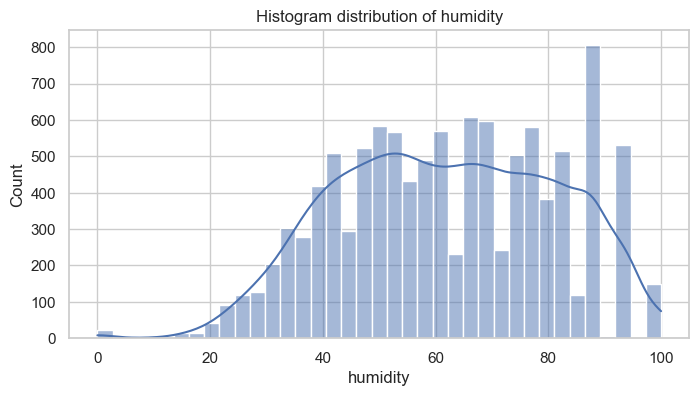

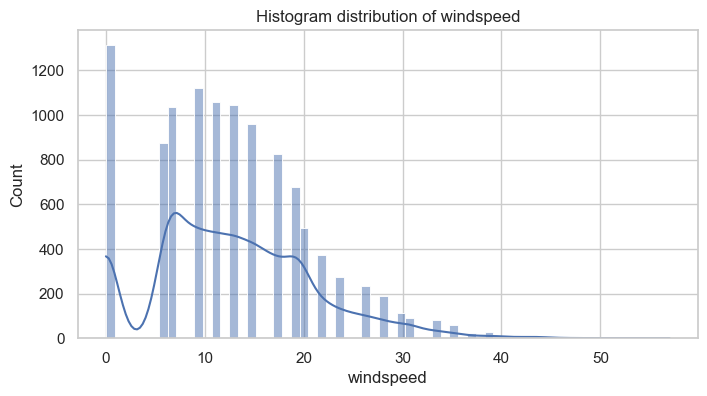

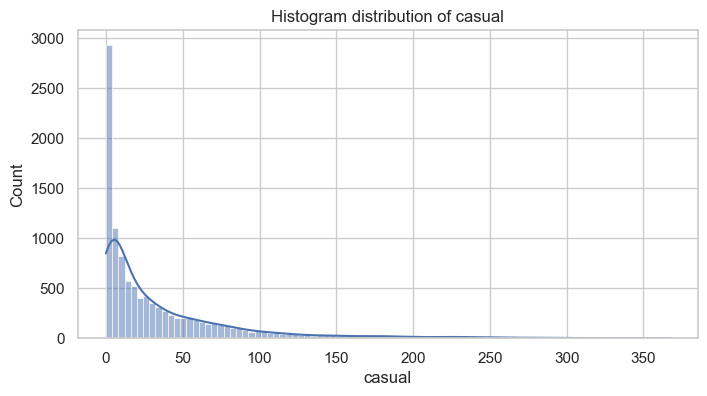

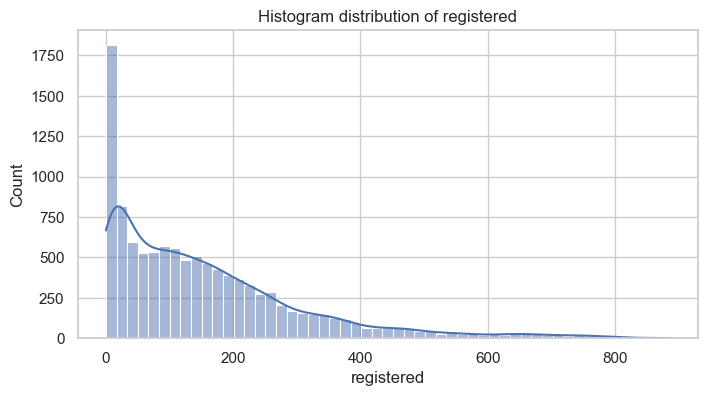

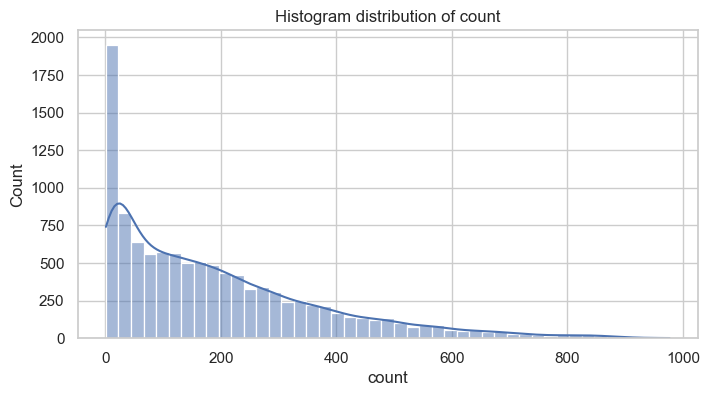

In [7]:
# Task 1 Code
# We loop through numerical columns to create histograms
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram distribution of {col}')
    plt.show()

## Task 2

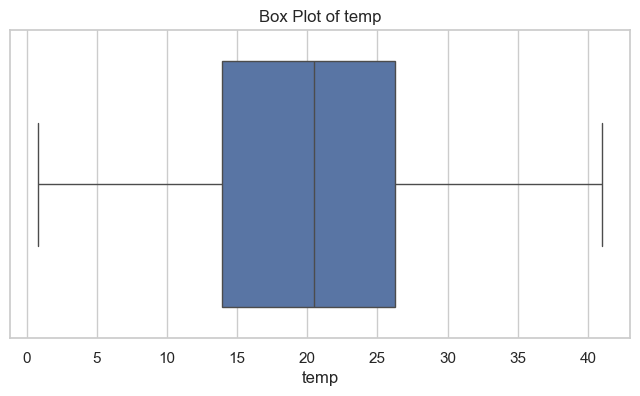

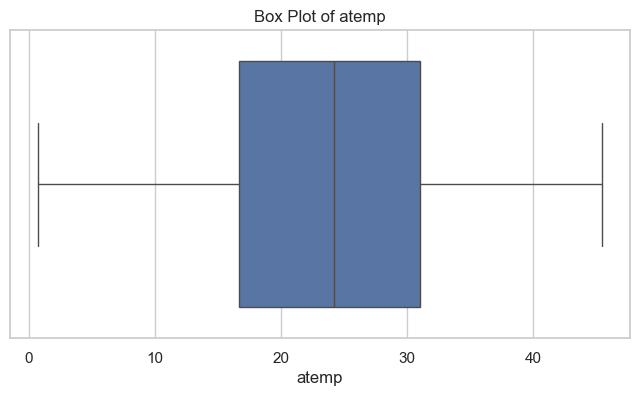

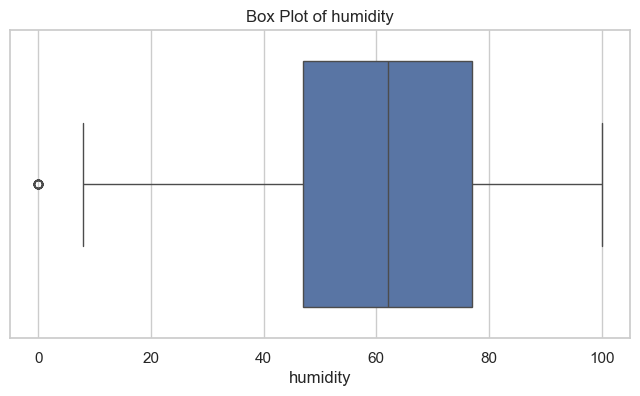

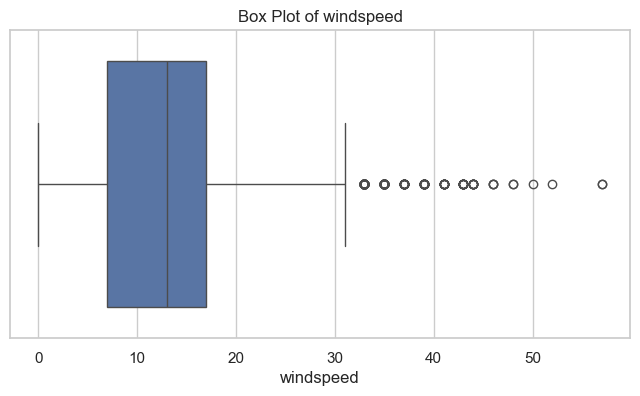

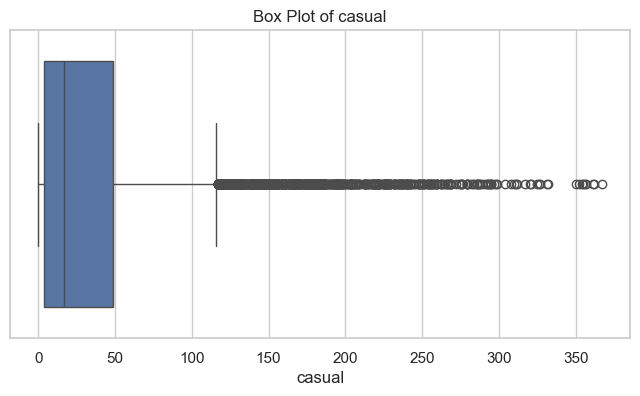

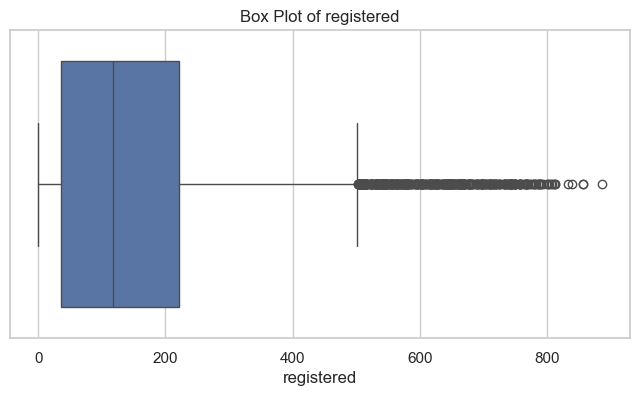

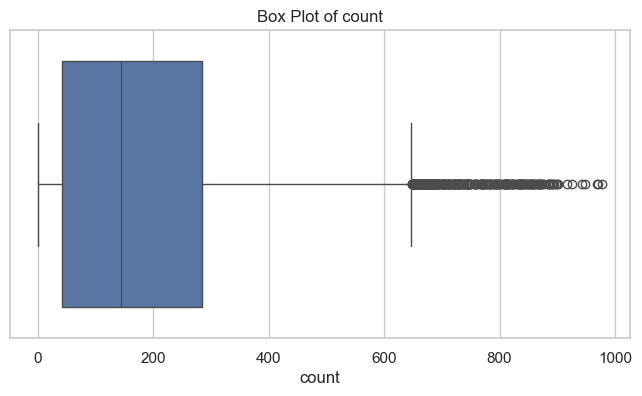

In [8]:
# Task 2 Code
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## Task 3

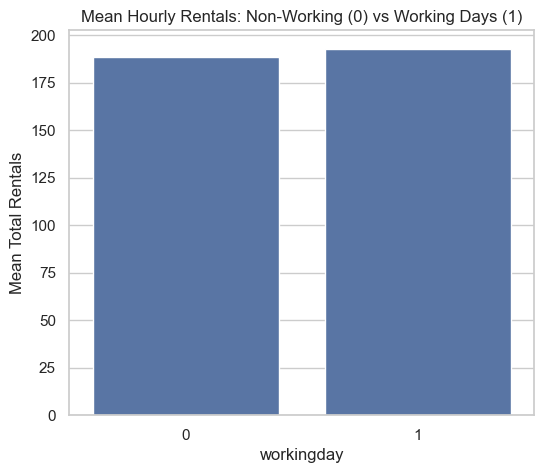

In [6]:
# Task 3 Code
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='workingday', y='count', errorbar=None)
plt.title('Mean Hourly Rentals: Non-Working (0) vs Working Days (1)')
plt.ylabel('Mean Total Rentals')
plt.show()

## Task 4

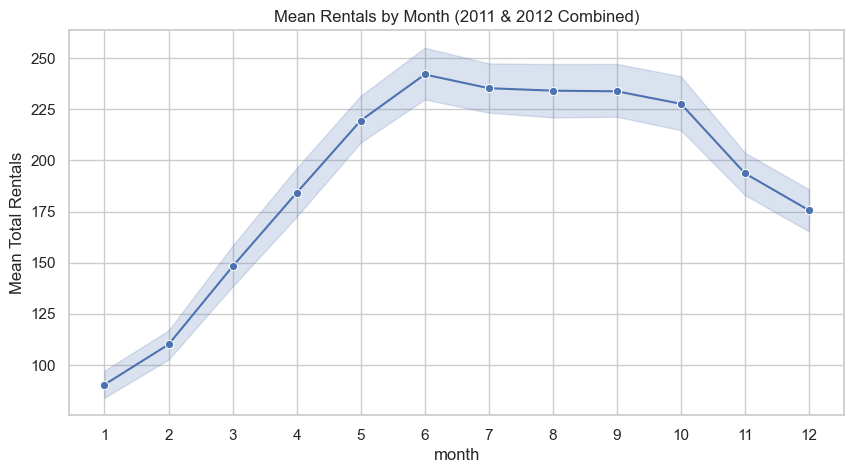

In [7]:
# Task 4 Code
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='month', y='count', marker='o', estimator='mean')
plt.title('Mean Rentals by Month (2011 & 2012 Combined)')
plt.xticks(range(1, 13)) # Ensure all 12 months are shown
plt.ylabel('Mean Total Rentals')
plt.show()

## Task 5

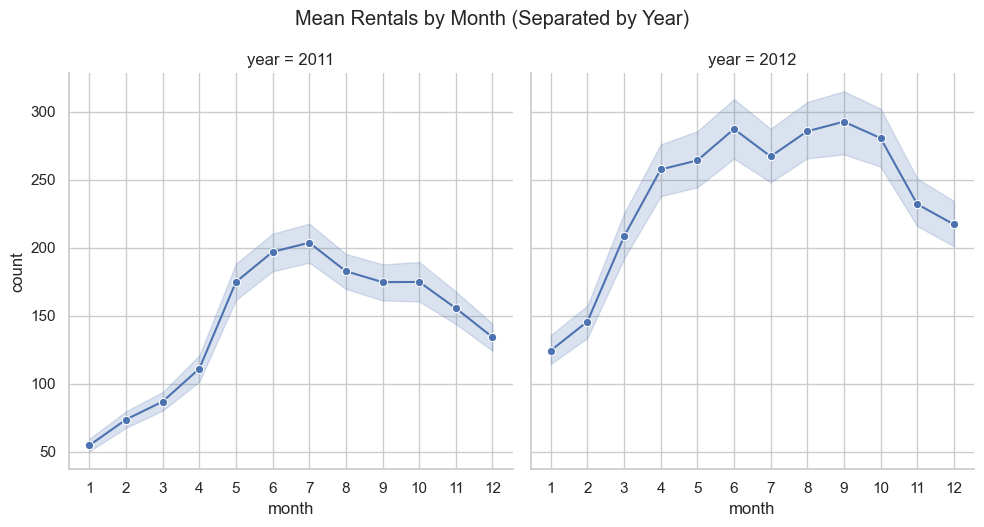

In [8]:
# Task 5 Code
# kind='line' creates the trend, col='year' creates the multi-panel (side-by-side)
g = sns.relplot(
    data=df, 
    x='month', 
    y='count', 
    col='year', 
    kind='line', 
    marker='o', 
    estimator='mean'
)
g.fig.suptitle('Mean Rentals by Month (Separated by Year)', y=1.05)
g.set(xticks=range(1, 13))
plt.show()

## Task 6

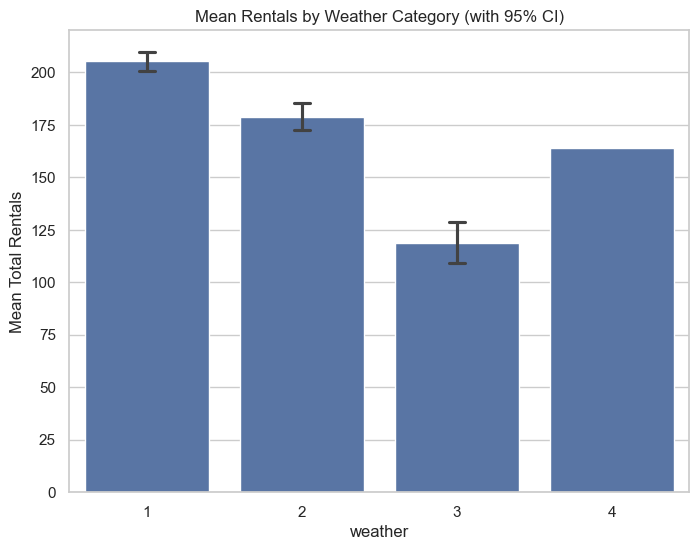

In [9]:
# Task 6 Code
plt.figure(figsize=(8, 6))
# By default, sns.barplot shows the mean and the 95% confidence interval (the black line)
sns.barplot(data=df, x='weather', y='count', capsize=0.1)
plt.title('Mean Rentals by Weather Category (with 95% CI)')
plt.ylabel('Mean Total Rentals')
plt.show()

## Task 7

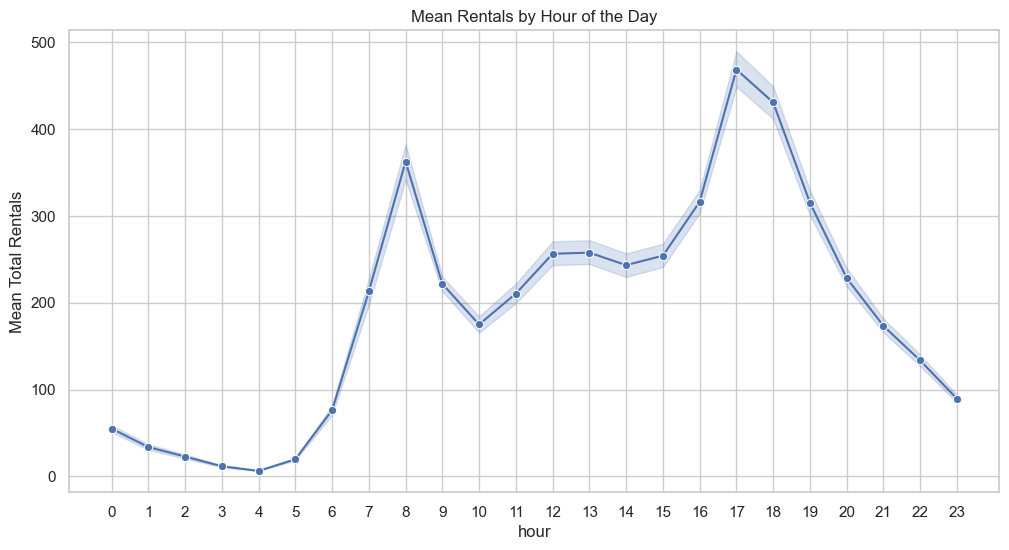

In [10]:
# Task 7 Code
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='count', marker='o')
plt.title('Mean Rentals by Hour of the Day')
plt.xticks(range(0, 24))
plt.ylabel('Mean Total Rentals')
plt.grid(True)
plt.show()

## Task 8

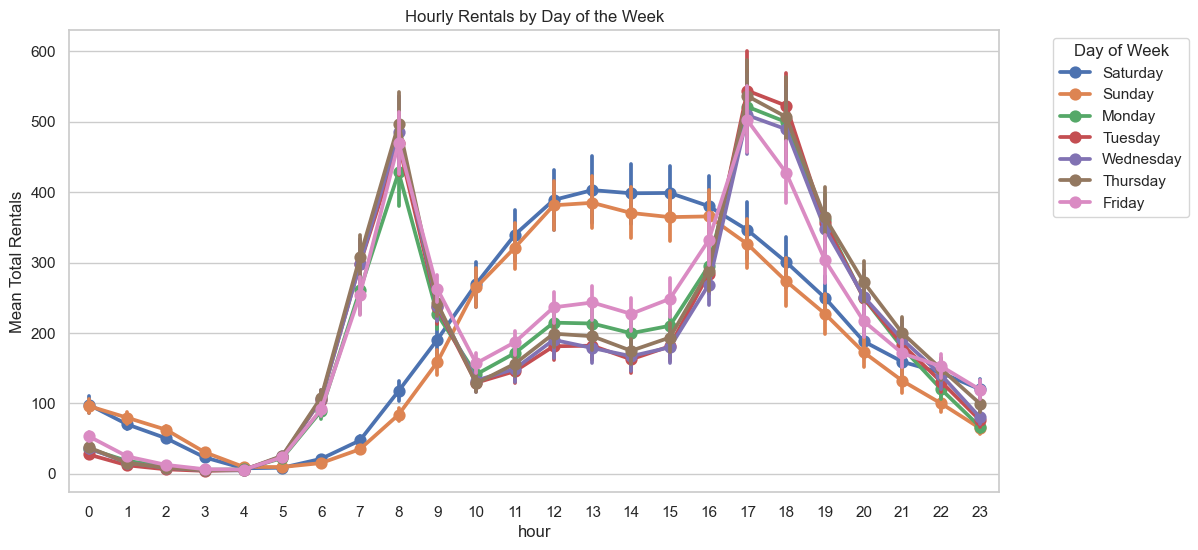

In [11]:
# Task 8 Code
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='hour', y='count', hue='day_of_week')
plt.title('Hourly Rentals by Day of the Week')
plt.ylabel('Mean Total Rentals')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Task 9

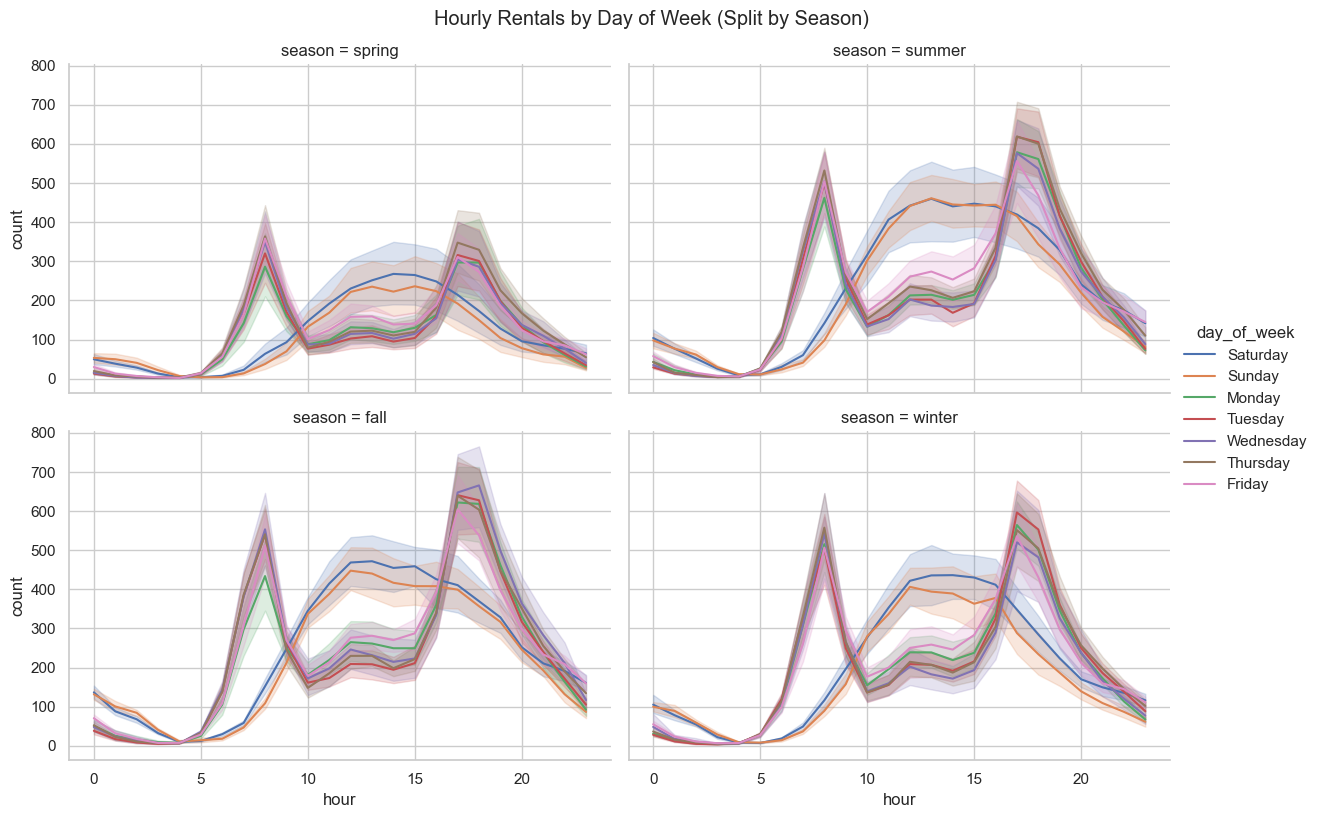

In [16]:
# Task 9 Code
# We use relplot with col='season' to create a panel for each season
g = sns.relplot(
    data=df, 
    x='hour', 
    y='count', 
    col='season', 
    hue='day_of_week', 
    kind='line',
    estimator='mean',
    col_wrap=2,  # Arranges them in a 2x2 grid
    height=4, 
    aspect=1.5
)
g.fig.suptitle('Hourly Rentals by Day of Week (Split by Season)', y=1.02)
plt.show()

## Task 10

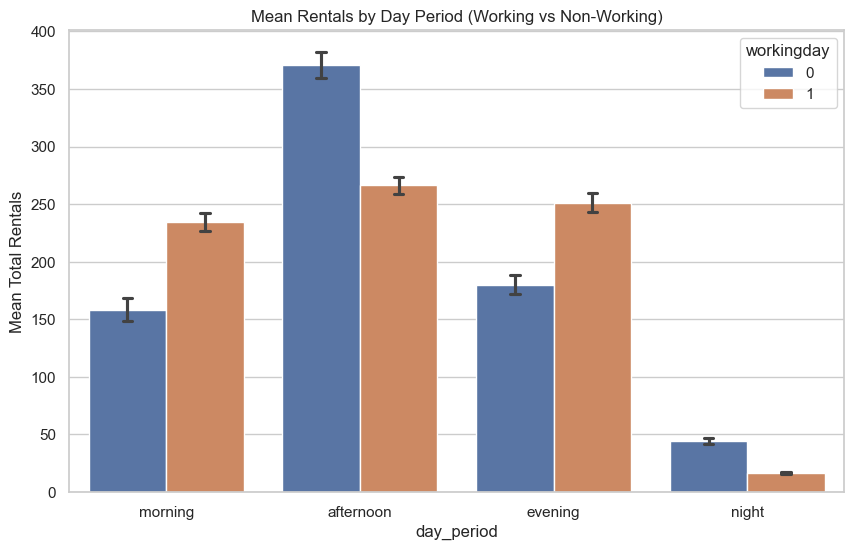

In [17]:
# Task 10 Code
plt.figure(figsize=(10, 6))
# Define a logical order for the periods
order_list = ['morning', 'afternoon', 'evening', 'night']

# Plotting with hue='workingday' adds extra insight (Task 62 asks if it differs for working days)
sns.barplot(data=df, x='day_period', y='count', order=order_list, capsize=0.1, hue='workingday')

plt.title('Mean Rentals by Day Period (Working vs Non-Working)')
plt.ylabel('Mean Total Rentals')
plt.show()

## Task 11

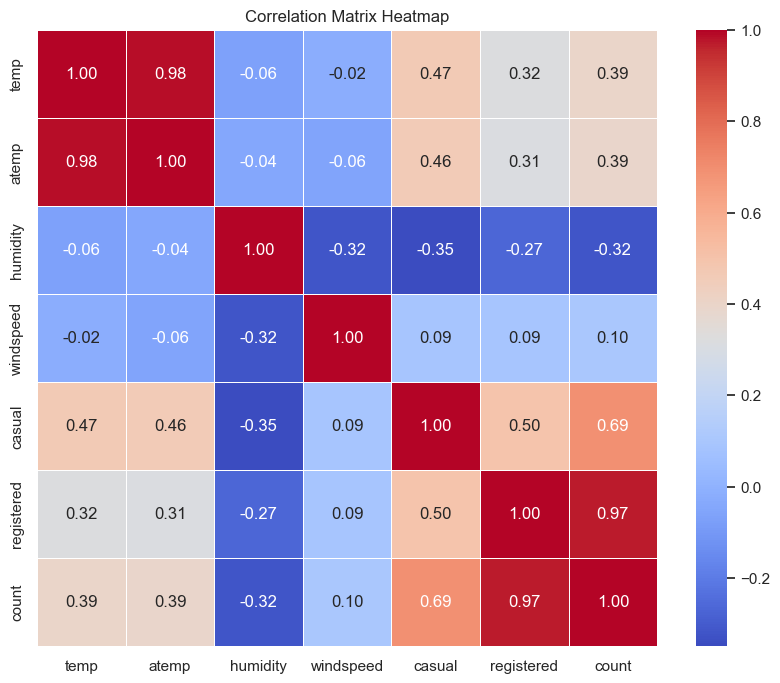

In [18]:
# Task 11 Code
plt.figure(figsize=(10, 8))

# Select only numerical columns for the correlation matrix
numeric_cols_corr = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corr_matrix = df[numeric_cols_corr].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()